In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
os.environ['KAGGLE_CONFIG.DOR']="/content/drive/MyDrive/Colab Notebooks/input"

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/input"

/content/drive/MyDrive/Colab Notebooks/input


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/input


cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:

# Kaggle DFDC veri setini indirme komutu
!kaggle competitions download -c deepfake-detection-challenge -p /content/drive/MyDrive/Datasetss/DFDC/






Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!unzip /content/drive/MyDrive/Datasets/deepfake-and-real-images.zip -d /content/data


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/data/Dataset/Validation/Real/real_5499.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_55.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_550.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5500.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5501.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5502.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5503.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5504.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5505.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5506.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5507.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5508.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_5509.jpg  
  inflating: /content/data/Dataset/Validation/Real/real_551.jpg  
  inflating: /conte

In [ ]:
!ls /content/data/Dataset


Test  Train  Validation


In [ ]:
!find /content/ -type d -name "Test"


/content/data/Dataset/Test


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.metrics import roc_curve, roc_auc_score
import cv2
import matplotlib.pyplot as plt
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D,Dropout,MaxPooling2D,Attention,Conv2D,concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import Xception,VGG16,VGG19,MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Layer, MultiHeadAttention
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LeakyReLU
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [ ]:
train_path="/content/data/Dataset/Train"
test_path="/content/data/Dataset/Test"
val_path="/content/data/Dataset/Validation"

In [ ]:
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   #rotation_range=20,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   #horizontal_flip=True,
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(  rescale=1./255.0)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (299,299),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (299,299),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle=False)
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (299,299),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 140002 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


In [ ]:
#Implement the MODEL

#base_model = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

#x = base_model.output
#x = GlobalAveragePooling2D()(x)
#predictions = Dense(1, activation='sigmoid')(x)  # Single unit for binary classification

#combined_model = Model(inputs=base_model.input, outputs=predictions)

#for layer in base_model.layers:
    #layer.trainable = False
#for layer in base_model.layers[-20:]:
    #layer.trainable = True

In [ ]:
# Define your data input shape
input_shape = (299, 299, 3)  # Adjust according to your dataset

# Load the Xception model without the top layer (fully connected layer)
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True
# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
combined_model = Model(inputs=base_model.input, outputs=predictions)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
combined_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 20,927,593 (79.83 MB)

 Trainable params: 7,392,489 (28.20 MB)

 Non-trainable params: 13,535,104 (51.63 MB)

In [ ]:
learning_rate = 0.000001  # You can set your desired learning rate value

# Create an Adam optimizer instance with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)


In [ ]:
combined_model.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = combined_model.fit(
    training_set,
    epochs=17,
    validation_data=val_set,
    #callbacks=[callbacks]
)

Epoch 1/17


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 678s 148ms/step - accuracy: 0.6250 - loss: 0.6538 - val_accuracy: 0.7952 - val_loss: 0.4884
Epoch 2/17
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 634s 145ms/step - accuracy: 0.8136 - loss: 0.4437 - val_accuracy: 0.8359 - val_loss: 0.3722
Epoch 3/17
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 634s 145ms/step - accuracy: 0.8651 - loss: 0.3262 - val_accuracy: 0.8566 - val_loss: 0.3256
Epoch 4/17
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 634s 145ms/step - accuracy: 0.8896 - loss: 0.2712 - val_accuracy: 0.8695 - val_loss: 0.2982
Epoch 5/17
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 634s 145ms/step - accuracy: 0.9053 - loss: 0.2346 - val_accuracy: 0.8799 - val_loss: 0.2776
Epoch 6/17
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 634s 145ms/step - accuracy: 0.9155 - loss: 0.2114 - val_accuracy: 0.8875 - val_loss: 0.2629
Epoch 7/17
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 634s 145ms/step - accuracy: 0.9208 - loss: 0.1968 - val_accuracy: 0.8930 - val_loss: 0.2500
Epoch 8/17
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 634s 145ms/step - accuracy: 0.9

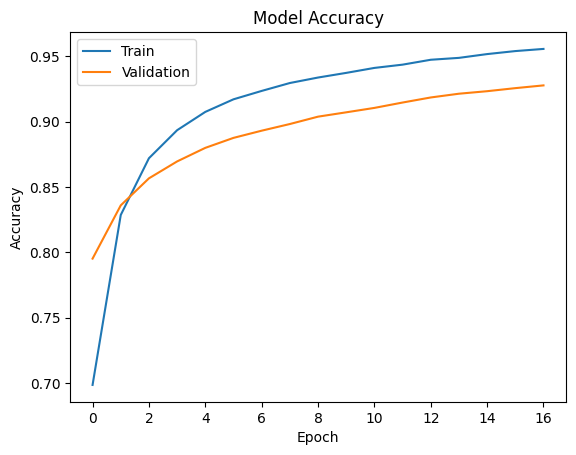

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

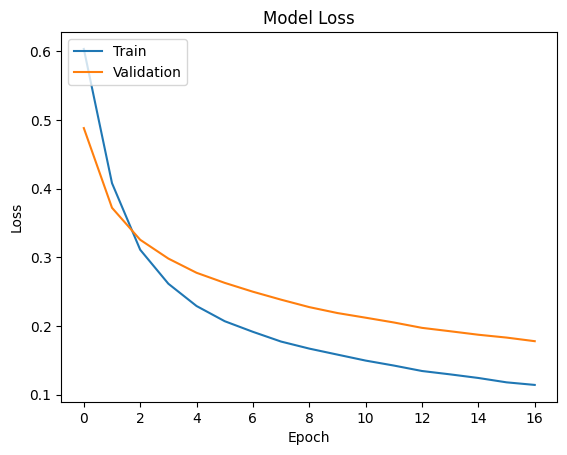

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predict the classes using the test set
test_pred = combined_model.predict(test_set)
test_pred_classes = np.round(test_pred)

# Get the true classes of the test set
test_true_classes = test_set.classes

341/341 ━━━━━━━━━━━━━━━━━━━━ 46s 129ms/step


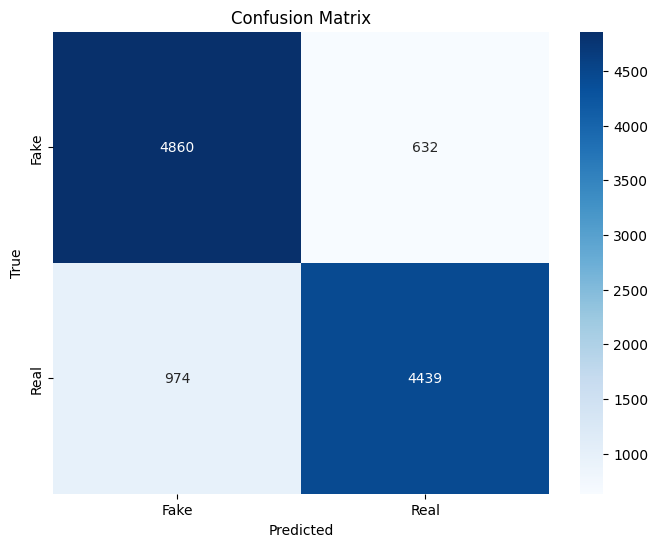

In [ ]:
# Plot confusion matrix as a heatmap
# Generate confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
evaluation = combined_model.evaluate(test_set)

341/341 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.8828 - loss: 0.2658


In [ ]:
print("Test Accuracy: {:.2f}%".format(evaluation[1] * 100))

Test Accuracy: 85.27%


In [ ]:
#Classification report
report = classification_report(test_true_classes, test_pred_classes, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0     0.8330    0.8849    0.8582      5492
     Class 1     0.8754    0.8201    0.8468      5413

    accuracy                         0.8527     10905
   macro avg     0.8542    0.8525    0.8525     10905
weighted avg     0.8541    0.8527    0.8525     10905



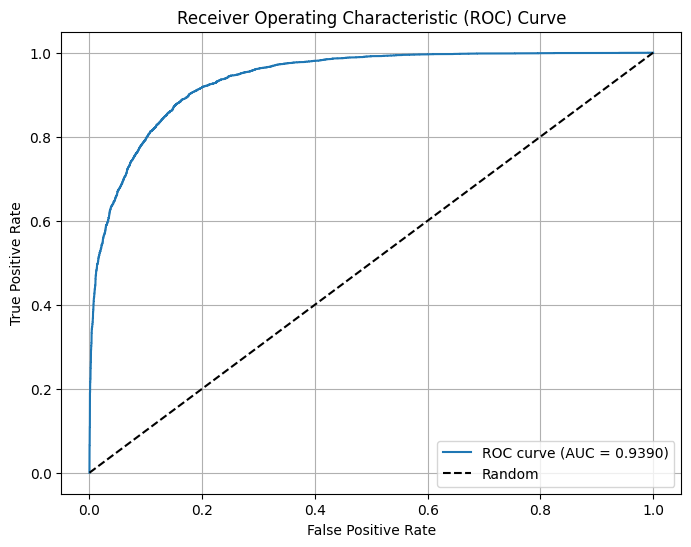

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_true_classes, test_pred)

# Calculate AUC
auc = roc_auc_score(test_true_classes, test_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

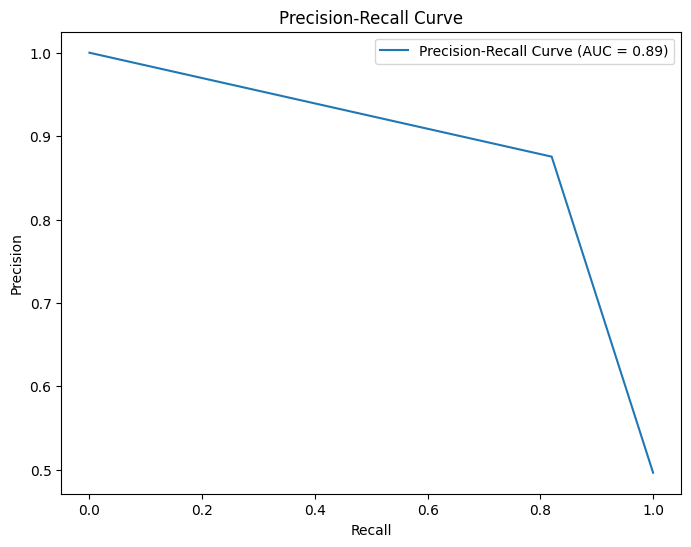

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(test_true_classes, test_pred_classes)

# Calculate the area under the precision-recall curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(test_true_classes, test_pred_classes).ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensitivity (True Positive Rate): {sensitivity:.4f}')
print(f'Specificity (True Negative Rate): {specificity:.4f}')

Sensitivity (True Positive Rate): 0.8201
Specificity (True Negative Rate): 0.8849


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Assuming you have obtained test_pred_classes and test_true_classes as described earlier

# Calculate F1 score for the test classes
f1 = f1_score(test_true_classes, test_pred_classes)
# Calculate accuracy to get error rate
accuracy = accuracy_score(test_true_classes, test_pred_classes)
error_rate = 1 - accuracy
# Calculate G-mean
g_mean = (sensitivity * specificity) ** 0.5

# Calculate F-measure
f_measure = 2 * ((sensitivity * specificity) / (sensitivity + specificity))

print(f'F1 Score: {f1:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'G-mean: {g_mean:.4f}')
print(f'F-measure: {f_measure:.4f}')

F1 Score: 0.8468
Error Rate: 0.1473
G-mean: 0.8519
F-measure: 0.8513
